# Unsupervised Classification With Autoencoder
## Arda Mavi
[Arda Mavi - GitHub](https://github.com/ardamavi)

### Summary:
In this project, we use autoencoders for classification as unsupervised machine learning algorithms with Deep Learning.<br/>
#### Give the 'images' and 'number of the class', then let the program do the rest!

In [1]:
# Arda Mavi
# Unsupervised Classification With Autoencoder

In [2]:
# Import
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Getting Dataset:
def get_dataset():
    (X, Y), (X_test, Y_test) = mnist.load_data()
    
    X = X.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    X = np.reshape(X, (len(X), 28, 28, 1))
    X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
    
    return X, X_test, Y, Y_test

X, X_test, Y, Y_test = get_dataset()

Training shape: (60000, 28, 28, 1)
60000 sample, 28 x 28 size grayscale image.

Test shape: (10000, 28, 28, 1)
10000 sample, 28 x 28 size grayscale image.

Examples:
5


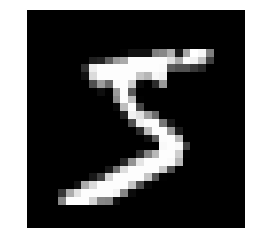

0


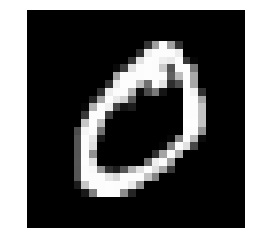

4


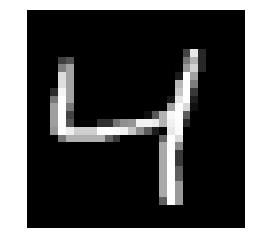

1


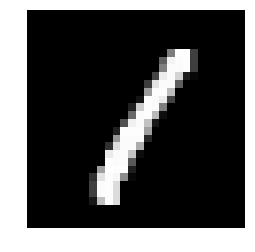

In [4]:
# About Dataset:
print('Training shape:', X.shape)
print(X.shape[0], 'sample,',X.shape[1] ,'x',X.shape[2] ,'size grayscale image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size grayscale image.\n')

print('Examples:')
for i in range(4):
    print(Y[i])
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

### First we test autoencoder:
[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

In [5]:
# Deep Learning Model:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# Output Shape: 4x4x8

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# Output Shape: 28x28x1

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [6]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []
#checkpoints.append(TensorBoard(log_dir='/Checkpoints/logs'))

In [7]:
# Training Model:
epochs = 1
batch_size = 100
autoencoder.fit(X, X, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 128s - loss: 0.2208 - val_loss: 0.1708


In [8]:
decoded_imgs = autoencoder.predict(X_test)

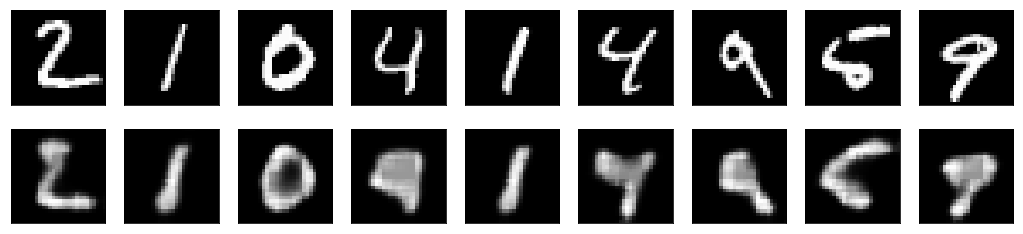

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Now we use autoencoder for unsupervised classification:

In [10]:
# Deep Learning Model:

num_class = 10

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Activation, Reshape, Flatten, Dropout
from keras.models import Model

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = Dense(num_class)(x)
encoded = Activation('softmax')(x)
# Output Shape: 10

x = Dense(128)(encoded)
x = Dropout(0.1)(x)
x = Reshape((4,4,8))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# Output Shape: 28x28x1

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [11]:
# Training Model:
epochs = 5
batch_size = 100
autoencoder.fit(X, X, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 111s - loss: 0.2622 - val_loss: 0.2190
Epoch 2/5
60000/60000 [==============================] - 111s - loss: 0.2110 - val_loss: 0.1947
Epoch 3/5
60000/60000 [==============================] - 118s - loss: 0.1936 - val_loss: 0.1808
Epoch 4/5
60000/60000 [==============================] - 112s - loss: 0.1838 - val_loss: 0.1727
Epoch 5/5
60000/60000 [==============================] - 127s - loss: 0.1773 - val_loss: 0.1667


In [12]:
decoded_imgs = autoencoder.predict(X_test)

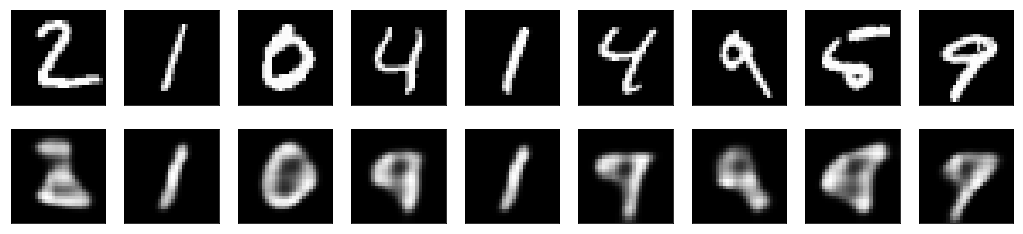

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
# Split autoencoder:
encoder = Model(input_img, encoded)
encode = encoder.predict(X_test)

Use the code to finding which cluster:<br/>
`np.argmax(encode[j], axis=0)`

### Now we look up result:

In [15]:
class_dict = np.zeros((num_class, num_class))
for i in range(X_test.shape[0]):
    class_dict[np.argmax(encode[i], axis=0)][Y_test[i]] += 1

print(class_dict)
    
neuron_class = np.zeros((num_class))
for i in range(num_class):
    neuron_class[i] = np.argmax(class_dict[i], axis=0)

print(neuron_class)

[[   0.    0.    0.    2.    0.    8.    0.    0.    0.    0.]
 [  21.    5.  219.   15.   37.   14.  733.    5.    5.    3.]
 [  22.    0.    0.    1.    0.    0.    0.    1.    0.    0.]
 [ 162.   21.    2.    4.  571.  107.  113.  141.  211.  580.]
 [ 160.    2.   78.  162.  345.  237.   15.  145.  286.  352.]
 [ 599.    2.  402.  569.    0.  273.   35.    3.  175.   10.]
 [   3.  247.  194.   17.   12.  173.    6.    6.   15.    5.]
 [   5.    1.   73.   61.    9.   18.   27.  681.   54.   21.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   8.  857.   64.  179.    8.   62.   29.   46.  228.   38.]]
[ 5.  6.  0.  9.  9.  0.  1.  7.  0.  1.]


Loss: 0.4079
Examples:


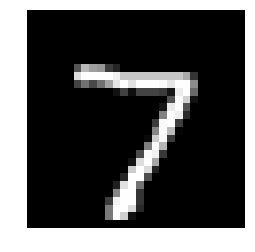

Class: 7 - Model's Output Class: 7.0


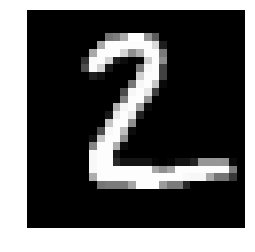

Class: 2 - Model's Output Class: 6.0


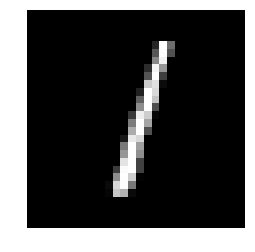

Class: 1 - Model's Output Class: 1.0


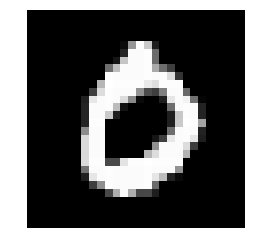

Class: 0 - Model's Output Class: 0.0


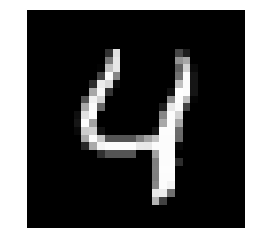

Class: 4 - Model's Output Class: 9.0


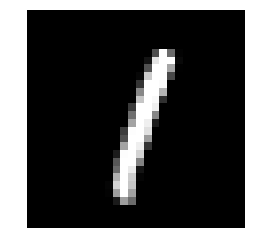

Class: 1 - Model's Output Class: 1.0


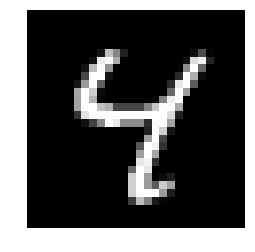

Class: 4 - Model's Output Class: 9.0


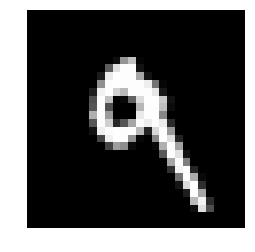

Class: 9 - Model's Output Class: 9.0


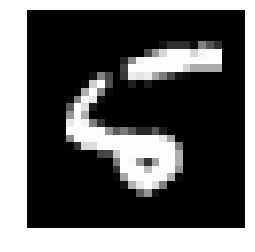

Class: 5 - Model's Output Class: 9.0


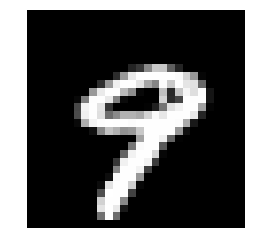

Class: 9 - Model's Output Class: 9.0


In [16]:
loss = 0
for i in range(X_test.shape[0]):
    if neuron_class[np.argmax(encode[i], axis=0)] == Y_test[i]:
        loss += 1
print('Loss:', loss/X_test.shape[0])
print('Examples:')
for i in range(10):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()
    neuron = np.argmax(encode[i], axis=0)
    print('Class:', Y_test[i], '- Model\'s Output Class:', neuron_class[neuron])

### Thats it! Thank you!
#### Still in development